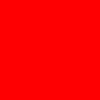

In [ ]:
from PIL import Image

img = Image.new('RGB', (100, 100), color = 'red')
img.save('red_square.png')
# To display in Colab (optional, adds a line):
from IPython.display import Image as IPyImage
IPyImage(filename='red_square.png')

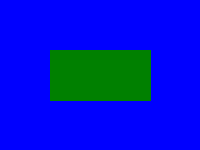

In [ ]:
from PIL import Image, ImageDraw

img = Image.new('RGB', (200, 150), color = 'blue')
draw = ImageDraw.Draw(img)
draw.rectangle((50, 50, 150, 100), fill='green')
img.save('blue_with_green_rectangle.png')
# To display in Colab (optional):
from IPython.display import Image as IPyImage
IPyImage(filename='blue_with_green_rectangle.png')

In [ ]:
%pip install stability-sdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.8 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.73.1
    Uninstalling grpcio-1.73.1:
      Successfully uninstalled grpcio-1.73.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.2 requires grpcio>=1.71.2, but you have grpcio 1.63.2 which is incompatible.


In [ ]:
!pip install -qqq diffusers accelerate transformers safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.5 MB/s eta 0:00:00


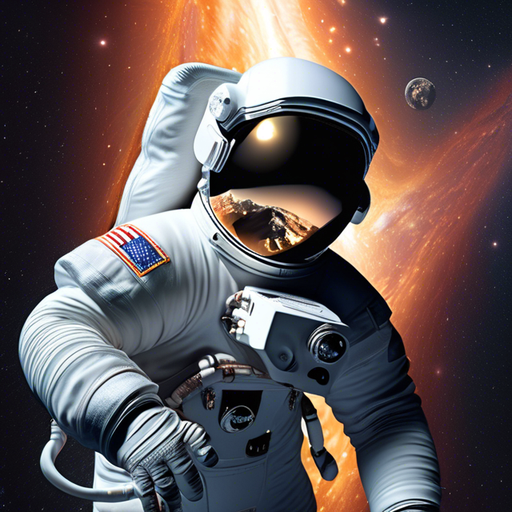

In [ ]:
import os
import io
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

# 1. Set up API Key and Host (Replace 'YOUR_STABILITY_API_KEY' with your actual key)
os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'
os.environ['STABILITY_KEY'] = 'sk-wCwvC3IDgmxQzn9MhbUOUy0BsZwXTyZJjHTU69OaqyqVyfxF'

# 2. Initialize the API client
stability_api = client.StabilityInference(key=os.environ['STABILITY_KEY'], engine="stable-diffusion-xl-1024-v1-0")

# 3. Generate the image
answers = stability_api.generate(prompt="A photorealistic image of an astronaut in space", steps=30, width=512, height=512)

# 4. Process and display the image
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            display(img) # Display the image
            img.save("astronaut_simple.png") # save it